In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

### 1. Data preparation

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_prediction(train_data = x_train, train_label = y_train, test_data = x_test, 
                    test_label = y_test, prediction = None):
    
    plt.figure(figsize = (10, 7))
    
    plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")  
    plt.scatter(test_data, test_label, c = "g", s = 4, label = "Testing data")

    if prediction is not None:
        plt.scatter(test_data, prediction, c = "r", s = 4, label = "Prediction")

        plt.legend(prop = {"size" : 14});

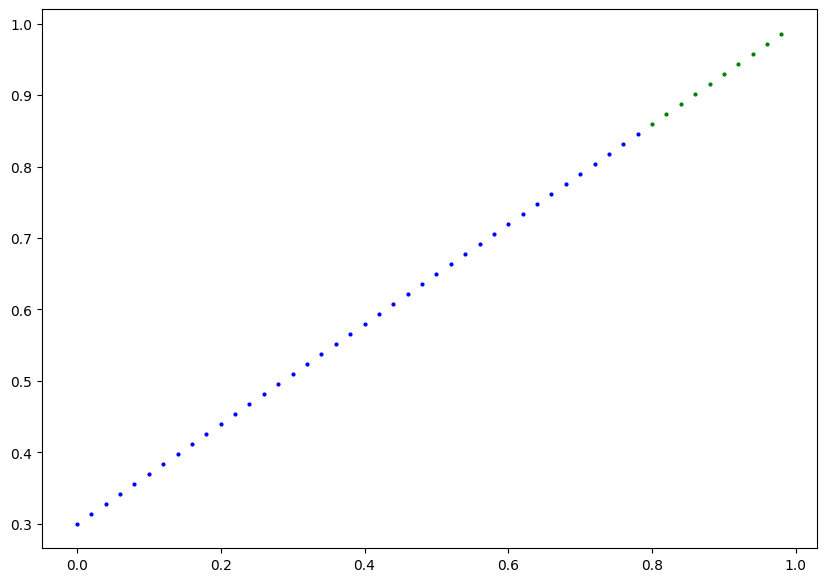

In [5]:
plot_prediction();

### 2. Model building

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

first_model = LinearRegressionModel()

print(list(first_model.parameters()))
print(first_model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
